In [1]:
#https://www.zybuluo.com/hanbingtao/note/476663
#手写数字识别

#数据下载
# from tensorflow.examples.tutorials.mnist import input_data
# mnist=input_data.read_data_sets('/tmp/',one_hot=True)
#或者：download:http://yann.lecun.com/exdb/mnist/

#文件路径
import os

base_path='/Users/yexianyong/Downloads/machine_learning/mnist'
training_images_path=os.path.join(base_path,'train-images-idx3-ubyte')
training_labels_path=os.path.join(base_path,'train-labels-idx1-ubyte')
test_images_path=os.path.join(base_path,'t10k-images-idx3-ubyte')
test_labels_path=os.path.join(base_path,'t10k-labels-idx1-ubyte')

training_images_path

'/Users/yexianyong/Downloads/machine_learning/mnist/train-images-idx3-ubyte'

In [2]:
#读取文件
#http://blog.csdn.net/simple_the_best/article/details/75267863
import struct
import numpy as np

def load_mnist(images_path,labels_path,kind='train'):
    """Load MNIST data from path"""
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)

    return images, labels
images,labels=load_mnist(training_images_path,training_labels_path)
images,labels

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

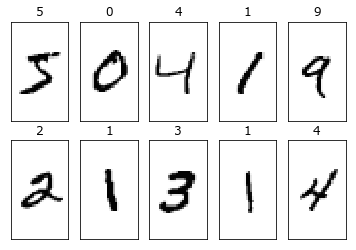

In [3]:
#可视化
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True)

ax = ax.flatten()
for i in range(10):
    img = images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(labels[i])
    
ax[0].set_xticks([])
ax[0].set_yticks([])

plt.show()

In [4]:
#构造训练相关数据
#给images添加bias：1

#inputs
inputs=np.zeros((images.shape[0],images.shape[1]+1))
inputs[:,0:1]=1#为数据添加bias 1
inputs[:,1:]=images[:,:] 

inputs

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [5]:
#超参数确定
#Three layers
#input layer nodes:785个(已添加bias)
#hidden layer nodes:301个(已添加bias)
#output layer nodes:10个

#weights不能为0
w12=np.random.uniform(-0.1,0.1,(301,inputs.shape[1]))
w23=np.random.uniform(-0.1,0.1,(10,301))

#学习率
µ=0.001

w12.shape,w12,w23.shape,w23

((301, 785), array([[ 0.07319002,  0.02416462, -0.03886408, ...,  0.04311311,
          0.08146574, -0.01957762],
        [ 0.09161252, -0.01052021,  0.08191635, ..., -0.07487355,
         -0.02006666, -0.06262183],
        [ 0.05554247,  0.07769375,  0.08417353, ..., -0.01789507,
         -0.02749267,  0.02156663],
        ...,
        [-0.0880929 ,  0.07233561,  0.06116076, ..., -0.04103263,
          0.02335407,  0.03525402],
        [-0.0570384 ,  0.0503442 ,  0.07335777, ..., -0.08070767,
          0.05559287,  0.08043005],
        [ 0.07413528, -0.04862263,  0.00573881, ...,  0.03982171,
         -0.02879728,  0.05367658]]), (10,
  301), array([[ 0.08945232, -0.068773  , -0.05586917, ...,  0.06953051,
          0.07203974, -0.04868864],
        [ 0.04931885, -0.00309411, -0.09290964, ...,  0.04495044,
          0.09597188, -0.05772832],
        [-0.085719  , -0.00515926,  0.06408781, ..., -0.06396675,
          0.05087416, -0.00568066],
        ...,
        [-0.0654656 , -0.01694

In [6]:
#计算
#激活函数sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def get_result(vec):
    max_value_index = 0
    max_value = 0
    for i in range(len(vec)):
        if vec[i] > max_value:
            max_value = vec[i]
            max_value_index = i
    return max_value_index

def softmax(vec):
    return vec/np.sum(vec)
 

for x,y in zip(inputs,labels):
    
    #计算输出值
    z2=w12.dot(x)
    a2=sigmoid(z2)
    
    z3=w23.dot(a2)
    a3=softmax(z3)
#     print('output:',a3)
    
    #反向传播
    #######################
    label=np.zeros(10)
    label[y]=1
#     print('lable:',label)
#     print('output:',get_result(a3),'label:',y)
    
    delta3=a3-label
#     print('delta3:',delta3)
    
    #更新w23
    w23=w23+µ*delta3.reshape(len(delta3),1).dot(a2.reshape(1,len(a2)))
    
    #计算a2节点误差delta2
    delta2=a2*(1-a2)*w23.T.dot(delta3)
    
    #更新w12
#     print(x.shape,w12.shape,delta2.shape)
    w12=w12+µ*delta2.reshape(len(delta2),1).dot(x.reshape(1,len(x)))
    
    #######################
    
w12,w23

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


(array([[ 0.07299   ,  0.02416462, -0.03886408, ...,  0.04311311,
          0.08146574, -0.01957762],
        [ 0.09100999, -0.01052021,  0.08191635, ..., -0.07487355,
         -0.02006666, -0.06262183],
        [ 0.05568924,  0.07769375,  0.08417353, ..., -0.01789507,
         -0.02749267,  0.02156663],
        ...,
        [-0.08782714,  0.07233561,  0.06116076, ..., -0.04103263,
          0.02335407,  0.03525402],
        [-0.05659884,  0.0503442 ,  0.07335777, ..., -0.08070767,
          0.05559287,  0.08043005],
        [ 0.07405632, -0.04862263,  0.00573881, ...,  0.03982171,
         -0.02879728,  0.05367658]]),
 array([[ 0.09864206,  0.27878236, -0.02321745, ...,  0.07130745,
         -0.03926389,  0.00130232],
        [ 0.03051141, -0.24614276,  0.04276779, ...,  0.04668549,
          0.06400338, -0.04377259],
        [-0.09932032, -0.12278856,  0.03701976, ..., -0.04328043,
          0.08904739,  0.00389261],
        ...,
        [-0.04526638, -0.08217903, -0.00102179, ...,  

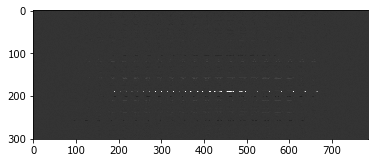

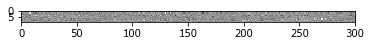

In [7]:
def show(img):
    fig,ax=plt.subplots()
    implot=plt.imshow(img)
    plt.gray()
    plt.show()
    
show(w12)
show(w23)

In [8]:
test_images,test_labels=load_mnist(test_images_path,test_labels_path)
#数据预处理
#inputs
test_inputs=np.zeros((test_images.shape[0],test_images.shape[1]+1))
test_inputs[:,0:1]=1#为数据添加bias 1
test_inputs[:,1:]=test_images[:,:] 

error_counts=0
for x,y in zip(test_inputs,test_labels):
    
    #计算输出值
    z2=w12.dot(x)
    a2=sigmoid(z2)
    
    z3=w23.dot(a2)
    a3=softmax(z3)
    
    if int(get_result(a3))!=int(y):
        error_counts+=1
error_counts/len(test_labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0.1495